<h5><b> DATA WRANGLING WITH PYTHON

In [3]:
import pandas as pd
from numpy import *
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import Dataframe
df = pd.read_csv('./attacks.csv', encoding = 'latin-1', index_col= 'original order').dropna(how = 'all')
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
original order,,,,,,,,,,,,,,,,,,,,,
6303.0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN
6302.0,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN


In [5]:
# remove lines with more than 75% missing
df.dropna(thresh=round(df.shape[1] * 0.75), inplace = True)

# rename columns
df.columns = df.columns.str.lower().str.rstrip().str.replace(' ', "_")

#delete columns
df.drop(columns=['case_number.1', 'case_number.2', 'unnamed:_22', 'unnamed:_23', 'href_formula'], inplace = True)

In [6]:
#column 'case_number'
df.loc[df.case_number.isna(), ['case_number']] = '1905.09.06-R'

In [7]:
#create column 'month' 
month_to_year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = NaN

for month in month_to_year:
    df.loc[df.date.str.contains(month, case= False), ['month']] = month

#'month' as 'category'
df.month = df.month.astype('category')

#'date' as "date"
df.date = pd.to_datetime(df.date, errors='coerce')

df.month.value_counts().nlargest(12)

Jul    627
Aug    571
Sep    527
Jan    494
Jun    470
Oct    425
Apr    425
Dec    417
Mar    387
Nov    376
May    368
Feb    359
Name: month, dtype: int64

In [8]:
#column 'year'
#fill values NaN
df.year.fillna(0, inplace = True)

#'year' as 'int'
df.year = df.year.astype(int)

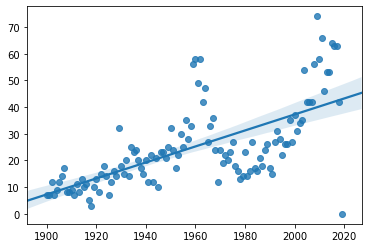

In [33]:
#create graphic: number of attacks per year from 1900  (95% confidence interval by default)

to_years = list(range(1900, 2020, 1))
n_attacks = []
for year in to_years:
    n = (df.year == year).sum()
    n_attacks.append(n)
    
#attacks number by year
sns.regplot(x = to_years, y = n_attacks)

In [ ]:
#column 'activity'
#fill values NaN
df.activity.fillna('Unknow', inplace = True)

practive = {'surf': 'Surfing', 'swim': 'Swimming', 'spear': 'Spear', 'fish': 'Fishing', 'stand': 'Standing', 'divin': 'Diving',
            'wadin': 'Wading', 'padd': 'Padding', 'feeding': 'Feeding Sharks', 'snork': 'Snorkeling', 'board': 'Body boarding',
           'kayak': 'Kayaking', 'treading': 'Treading water', 'walk':'walking', 'float':'Floating', 'rowing': 'Rowing',
           'can[oe]ing': 'Canoeing'}


# group values
for key, value in practive.items():
    df.loc[df.activity.str.contains(key, case= False), ['activity']] = value

#'activity' as 'category'
df.activity = df.activity.astype('category')

#df.query("activity not in ['Surfing', 'Swimming', 'Fishing', 'Standing', 'Diving', 'Wading', 'Unknow', 'Padding', 'Feeding Sharks', 'Snorkeling', 'Spear', 'Body boarding']")
df.loc[df.activity == 'Unknow', ['activity']] = NaN
df['activity'].value_counts().nlargest(3)
#df['activity'] = df.activity.where(df.activity.isin(top_four), other='OTHER')




In [11]:
#column 'sex'
#fill values NaN
df.sex.fillna('Unknow', inplace = True)

#assign values: M, F or Unknow
df.sex = df.sex.str.upper().str.replace('\s', '').str.replace('\W', 'Unknow').str.replace('N', 'M').str.replace('LLI', 'Unknow')

#'sex' as 'category'
df.sex = df.sex.astype('category')

In [12]:
#column 'age'

#change values to numeric
df['age'] = pd.to_numeric(df['age'], 'coerce')

#fill values NaN
df.age.fillna(0, inplace=True)

#'age' as 'int'
df.age = df.age.astype('int')

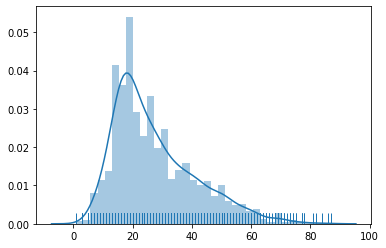

In [13]:
age = df.loc[df.age != 0 & (df.year > 1900), ['age']]

sns.distplot(age, rug = True);

In [14]:
#column 'type'

#fill values NaN
df.type.fillna('Invalid', inplace = True)

# group values
df.loc[df.type.str.contains('boat', case= False), ['type']] = 'Boating'

#'type' as 'category'
df.type = df.type.astype('category')

df.type.value_counts().nlargest(12)

Unprovoked      4379
Provoked         560
Invalid          460
Boating          302
Sea Disaster     171
Questionable       2
Name: type, dtype: int64

In [15]:
#column 'fatal'

#rename column
df.rename(columns={'fatal_(y/n)': 'fatal'}, inplace=True)

#assign values
df.loc[(df.injury.str.contains('^fatal', case= False)) & (df.fatal.isna()), ['fatal']] = 'Y'

#fill values NaN
df.fatal = df.fatal.fillna('UNKNOWN').str.replace('\s','').str.upper().str.replace('M','N').str.replace('\d+','UNKNOWN')

#'fatal' as 'category'
df.fatal = df.fatal.astype('category')

In [16]:
#column 'species'

#fill values NaN
df.species.fillna('Unknow', inplace = True)

to_species = {'white': 'White Shark', 'bull': 'Bull Shark', 'tiger': 'Tiger Shark', 'lemon': 'Lemon Shark', 'pointer': 'Mako Shark',
             'nurse': 'Nurse Shark', 'gr[ea]y': 'Grey Reef Shark', 'black': 'Blacktip Shark', 'wob':'Wobbegong Shark', 'juvenil':'Juvenile Shark',
             'ragge':'Raggedtooth Shark', 'Bronze':'Bronze Whaler Shark', 'hammer':'Hammerhead Shark', 'mako': 'Mako Shark', 'dog': 'Dog Shark',
             'zamb':'Zambesi Shark', 'seven': 'Sevengill Shark', 'blue':'Blue Shark', 'sand': 'Sand Shark', 'gummy': 'Gummy Shark', 'brown':'Brown Shark', 
             'dusk': 'Dusky Shark'}

#group values
for key, value in to_species.items():
    df.loc[df.species.str.contains(key, case= False), ['species']] = value

#'species' as 'category'
df.species = df.species.astype('category')

df.loc[df.species == 'Invalid', ['species']] = NaN
df.loc[df.species == 'Unknow', ['species']] = NaN
df.species.value_counts().nlargest(5)

White Shark       658
Tiger Shark       276
Bull Shark        183
Blacktip Shark    108
Nurse Shark        96
Name: species, dtype: int64

In [17]:
#import country files
countries = pd.read_csv('./mar.csv', sep=';', encoding='latin-1', usecols= ['The World Factbook[3] km', 'Country'])
countries.rename(columns={'The World Factbook[3] km': 'cost'}, inplace=True)
countries.dropna(inplace = True)
countries.loc[countries.Country.str.contains('United States$'), ['Country']] = 'EUA'
countries.loc[countries.Country.str.contains('aham'), ['Country']] = 'Bahamas'

countries_list = list(countries.Country)

# rename columns
countries.columns = countries.columns.str.lower().str.rstrip().str.replace(' ', "_")

countries.head()

C:\Users\renat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country,cost
0,Canada,"202,08"
1,Norway,"58,133"
2,Indonesia,"54,72"
3,Greenland,"44,087"
4,Russia,"37,653"


In [18]:
#column 'country'

#fill values NaN
df.country.fillna('Unknow', inplace = True)

#group values
for values in countries_list:
    df.loc[df.country.str.contains(values, case= False), ['country']] = values

#'country' as 'category'
df.country = df.country.astype('category')

C:\Users\renat\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [19]:
top_ten = df.country.where(df.year.between(2013, 2018)).value_counts().nlargest(10)
eixo_x = [i for i in top_ten.index]
eixo_y = [i for i in top_ten.values]

top_ten


USA                 337
Australia           157
South Africa         38
Bahamas              25
Brazil               14
Spain                13
REUNION              12
French Polynesia     12
New Caledonia        10
New Zealand           9
Name: country, dtype: int64

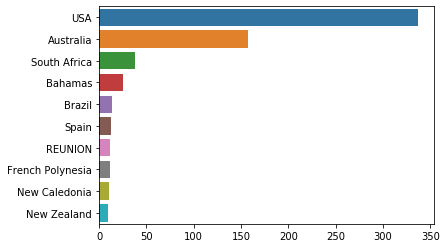

In [20]:
sns.barplot(x=eixo_y, y=eixo_x)
# country ranking between 2013 and 2018

In [21]:
#create column 'part_day'

#fill values NaN from 'time'
df.time.fillna(0, inplace= True)


parts_day = ['Morning', 'Afternoon', 'Evening', 'Night']
df.time = df.time.str.replace('h[0-9][0-9].*' , '')
df.time.fillna('Unknow', inplace=True)

df['part_day'] = 'Unknow'

#assign values
for period in parts_day:
    df.loc[df.country.str.contains(period, case= False), ['part_day']] = period

#'time' as 'numeric'    
df['time'] = pd.to_numeric(df['time'], 'coerce')

#assign remaining values
df.loc[df.time.between(5, 12), ['part_day']] = 'Morning'
df.loc[df.time.between(13, 17), ['part_day']] = 'Afternoon'
df.loc[df.time.between(18, 21), ['part_day']] = 'Evening'
df.loc[df.time.between(22, 23) | (df.time.between(0, 4)) , ['part_day']] = 'Night'

#'part_day' as 'category'
df.part_day = df.part_day.astype('category')

df.loc[df.part_day == 'Unknow', ['part_day']] = NaN
df.part_day.value_counts().nlargest(4)

Afternoon    1106
Morning       976
Evening       218
Night          39
Name: part_day, dtype: int64

In [22]:
# number of attack in Brazil
df.area.where(df.country == 'Brazil').value_counts().nlargest(10)

Pernambuco              73
Rio de Janeiro           8
Maranhão                 5
Bahia                    3
Rio Grande de Norte      2
Alagoas                  2
Boi Island, Victoria     1
Balneário Camboriú       1
Rio Grande Do Sul        1
Paraiba                  1
Name: area, dtype: int64

In [23]:
#concat columns 'cost' in 'df'
df = df.merge(countries, how = 'inner', on = 'country')

df.cost = df.cost.str.replace(',', '')
df.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex,...,injury,fatal,time,species,investigator_or_source,pdf,href,month,part_day,cost
2565,2017.06.07.R,NaT,2017,Unprovoked,United Kingdom,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Jun,NaN,12429
119,2014.10.02.a,2014-10-02,2014,Unprovoked,Australia,Western Australia,"Kelpids Beach, Wylie Bay, Esperance",Surfing,Sean Pollard,M,...,"Left arm & right hand severed, lacerations to ...",N,11.0,White Shark,"9News, 2/15/2015",2014.10.02.a-Pollard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Oct,Morning,2576
707,1958.06.15,1958-06-15,1958,Invalid,Australia,Queensland,Green Island,Swimming,Alva Colquhoun & Ilsa Konrads,F,...,"Injuries caused by coral, not the shark",UNKNOWN,NaN,NaN,"Natal Mercury, 6/18/1958",1958.06.15-Swimmers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,Jun,NaN,2576


In [24]:
#'part_day' as 'category'
df.cost = df.cost.astype('category')

eixos = df.cost.value_counts() #km of cost by attack number

eixos

2576     1285
2798      562
15134     122
7491      104
3542      103
         ... 
1288        1
1572        1
16          1
885         1
998         1
Name: cost, Length: 65, dtype: int64

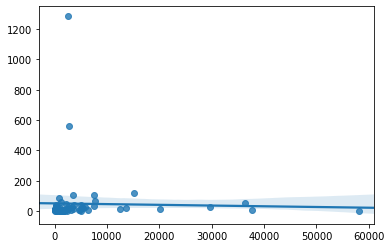

In [25]:
# correlation between coast and attacks
list_x = []
list_y = []

for i in eixos.index:
    list_x.append(i)
    
for i in eixos.values:
    list_y.append(i)

list_x = [int(elem) for elem in list_x]


#cost(km, country) by attacks number
sns.regplot(x = list_x, y = list_y)